<a href="https://colab.research.google.com/github/MilindAP/Multi-Link-Prediction-for-mmWave-and-subTHz-frequencies-using-LTC-LSTM-and-Symbolic-Regression/blob/main/NexGeneticProgramming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install gplearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gplearn.genetic import SymbolicRegressor
import gplearn.functions as gp
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sympy import *
from sklearn.utils.random import check_random_state
import graphviz
import time

In [ ]:
Data = pd.read_csv('/content/drive/MyDrive/My documents/MultiLink Prediction/new-snr.csv')

In [ ]:
#Data = pd.read_csv('/content/SNR30_Data.csv', header=None, names=['SNR'])
Data

,SNR
0,-8.61111
1,-9.91111
2,-9.93333
3,-9.94444
4,-9.03333
...,...
250,-18.55560
251,-18.55560
252,-18.55560
253,-18.55560


In [ ]:
# add a new column with index values starting from 1
Data.insert(0, 'index', range(1, len(Data)+1))

# save the dataframe to a new CSV file with index column
#Data.to_csv('new_filename.csv', index=False)

In [ ]:
Data

,index,SNR
0,1,-8.61111
1,2,-9.91111
2,3,-9.93333
3,4,-9.94444
4,5,-9.03333
...,...,...
250,251,-18.55560
251,252,-18.55560
252,253,-18.55560
253,254,-18.55560


In [ ]:
#Data = np.array([z, H]).T
columns = ['index', 'SNR']
Data = pd.DataFrame(data = Data, columns = columns)
Data.head()

,index,SNR
0,1,-8.61111
1,2,-9.91111
2,3,-9.93333
3,4,-9.94444
4,5,-9.03333


Text(0.5, 0, '$z$')

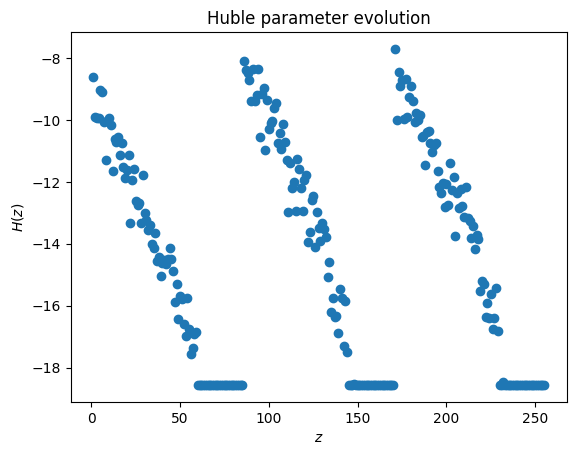

In [ ]:
plt.figure(dpi = 100)
plt.title('Huble parameter evolution')
plt.scatter(Data['index'], Data['SNR'])
plt.ylabel(r'$H (z)$')
plt.xlabel(r'$z$')

In [ ]:
X = Data[['index']]
y = Data['SNR']
y_true = y
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((178, 1), (77, 1), (178,), (77,))

In [ ]:
from gplearn.functions import make_function
import numpy as np
import math

In [ ]:
# Define the ReLU function
def my_ReLU(x):
    return x * (x > 0)

my_ReLU = gp.make_function(function=my_ReLU, name='ReLU', arity=1)

# def my_tanh(x):
#     return np.tanh(x)

# my_tanh = gp.make_function(function=my_tanh, name='tanh', arity=1)

# function_set = ['add', 'sub', 'mul', 'div', 'sin', 'cos', my_ReLU, my_tanh]
function_set = ['add', 'sub', 'mul', 'div', 'sin', 'cos', my_ReLU]


In [ ]:
est_gp = SymbolicRegressor(population_size=5000,function_set=function_set,
                           generations=20, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.0005, random_state=0)

#Parsimony coefficient = 0.01

In [ ]:
t0 = time.time()
est_gp.fit(X_train, y_train)
print('Time to fit:', time.time() - t0, 'seconds')

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    18.73      4.24639e+08        7          3.19525          2.80237      1.48m
   1    19.09          2088.32        7          3.05568          4.04304      2.05m
   2    21.38          3070.02       13          2.96557          3.35917      1.56m
   3    15.41          3516.85       17          2.75784          2.33243      1.82m
   4    10.56          1039.09       17          2.64144          3.36705      1.27m
   5    12.20          1099.44       14          2.56584          3.50885      1.10m
   6    16.38          1834.65       23          2.39713          2.09395      1.49m
   7    18.20          141.455       30           2.2163          2.42681      1.10m
   8    20.88          312.127       42          1.86969          1.57431  

In [ ]:
t0 = time.time()
y_gp1 = est_gp.predict(X_test)
print('Time to predict:', time.time() - t0, 'seconds')

Time to predict: 0.004936933517456055 seconds


In [ ]:
score_gp1 = est_gp.score(X_test, y_test)
print('R2:', score_gp1)

R2: 0.8249786149952006


In [ ]:
converter = {
    'add': lambda x, y : x + y,
    'sub': lambda x, y : x - y,
    'mul': lambda x, y : x*y,
    'div': lambda x, y : x/y,
    'sqrt': lambda x : x**0.5,
    'log': lambda x : log(x),
    'abs': lambda x : abs(x),
    'neg': lambda x : -x,
    'inv': lambda x : 1/x,
    'max': lambda x, y : max(x, y),
    'min': lambda x, y : min(x, y),
    'sin': lambda x : sin(x),
    'cos': lambda x : cos(x),
    'pow': lambda x, y : x**y,
    'my_ReLU':lambda x: ReLU(x)
}

In [ ]:

# converter = {
#     'add': lambda x, y : x + y,
#     'sub': lambda x, y : x - y,
#     'mul': lambda x, y : x*y,
#     'div': lambda x, y : x/y,
#     'sqrt': lambda x : x**0.5,
#     'log': lambda x : log(x),
#     'abs': lambda x : abs(x),
#     'neg': lambda x : -x,
#     'inv': lambda x : 1/x,
#     'max': lambda x, y : max(x, y),
#     'min': lambda x, y : min(x, y),
#     'sin': lambda x : sin(x),
#     'cos': lambda x : cos(x),
#     'pow': lambda x, y : x**y,
#     'my_tanh':lambda x: tanh(x)
# }

In [ ]:
next_e = sympify(str(est_gp._program), locals=converter)
next_e

sin(0.0666666666666667*X0) + sin(35.5185185185185*(ReLU(0.088) - 0.942085806280011 - 3.80228136882129*ReLU(-0.077*X0 + sin(0.077*X0 + sin(0.077*X0 + 0.200913242009132) + 14.385/X0))/X0)/X0) + sin(0.0666666666666667*X0 + 1) + sin(0.077*X0 - 0.563 + 14.385/X0) + sin(0.077*X0 + sin(0.077*X0 - 0.579) - 0.338) - sin(-ReLU(-0.077*X0) + sin(10.418278203971/X0) + sin(0.0666666666666667*X0) + sin(0.077*X0 - 0.579) - 15.4086733379675) - 14.595

In [ ]:
from sympy import symbols, sin

# Define the variables
x = symbols('X0')

simpl_next_e = next_e.simplify()

simpl_next_e

sin(0.0666666666666667*X0) + sin(0.0666666666666667*X0 + 1) + sin(0.077*X0 - 0.563 + 14.385/X0) + sin(0.077*X0 + sin(0.077*X0 - 0.579) - 0.338) - sin(-35.5185185185185*ReLU(0.088)/X0 + 33.46149215639/X0 + 135.051401211097*ReLU(-0.077*X0 + sin(0.077*X0 + sin(0.077*X0 + 0.200913242009132) + 14.385/X0))/X0**2) - sin(-ReLU(-0.077*X0) + sin(10.418278203971/X0) + sin(0.0666666666666667*X0) + sin(0.077*X0 - 0.579) - 15.4086733379675) - 14.595

In [ ]:
%pip install sympy

In [ ]:
import sympy as sp

# Define the variables
X0 = sp.symbols('X0')

# Define the custom ReLU function
def ReLU(x):
    return sp.Max(x, 0)

# Define the equation
equation = sp.sin(0.0667*X0) + sp.sin(35.518*(ReLU(0.088) - 0.942 - (3.802*ReLU(-0.077*X0 + sp.sin(0.077*X0 + sp.sin(0.077*X0 + 0.2009)) + 14.385/X0))/X0)/X0) \
           + sp.sin(0.0667*X0 + 1) + sp.sin(0.077*X0 - 0.563 + 14.385/X0) \
           + sp.sin(0.077*X0 + sp.sin(0.077*X0 - 0.579) - 0.338) \
           - sp.sin(-ReLU(-0.077*X0) + 10.418/X0 + sp.sin(0.0667*X0) + sp.sin(0.077*X0 - 0.579) - 15.408) - 14.595

# Simplify the equation
simplified_equation = sp.simplify(equation)

# Print the simplified equation
simplified_equation


sin(0.0667*X0) - sin(30.332372/X0 + 135.039436*Max(0, -0.077*X0 + sin(0.077*X0 + sin(0.077*X0 + 0.2009)) + 14.385/X0)/X0**2) + sin(0.0667*X0 + 1) + sin(0.077*X0 - 0.563 + 14.385/X0) + sin(0.077*X0 + sin(0.077*X0 - 0.579) - 0.338) - sin(sin(0.0667*X0) + sin(0.077*X0 - 0.579) - Max(0, -0.077*X0) - 15.408 + 10.418/X0) - 14.595

In [ ]:
y_gp = est_gp.predict(X_test)
score_gp1 = est_gp.score(X_test, y_test)
score_gp1

0.8249786149952006

Text(0.5, 0, 'index')

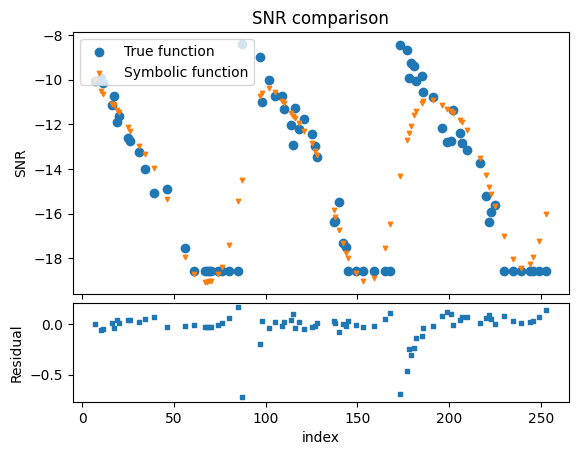

In [ ]:
fig = plt.figure(constrained_layout=False, dpi=100)
gs = fig.add_gridspec(nrows=7, ncols=1)
f_ax1 = fig.add_subplot(gs[0:5,0])
plt.title('SNR comparison')
plt.scatter(X_test, y_test, label = 'True function')
plt.scatter(X_test, y_gp1, marker = 'v', s = 10, label = 'Symbolic function')
plt.legend()
plt.ylabel('SNR')
f_ax2 = fig.add_subplot(gs[5:7, 0])
plt.scatter(X_test, 1. - y_gp1/y_test, marker = 's', s = 10)
plt.ylabel('Residual')
plt.xlabel('index')

In [ ]:
!pip install --upgrade graphviz
import graphviz

In [ ]:
dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data,
                        graph_attr={'fontsize': '16', 'fontcolor': 'red'})
graph.render('images/ex1', format='png', cleanup=True)
graph

TypeError: Source.__init__() got an unexpected keyword argument 'graph_attr'

In [ ]:
!pip install dtreeviz[notebook]
from dtreeviz.trees import *
from dtreeviz import dtreeviz # Import the dtreeviz function


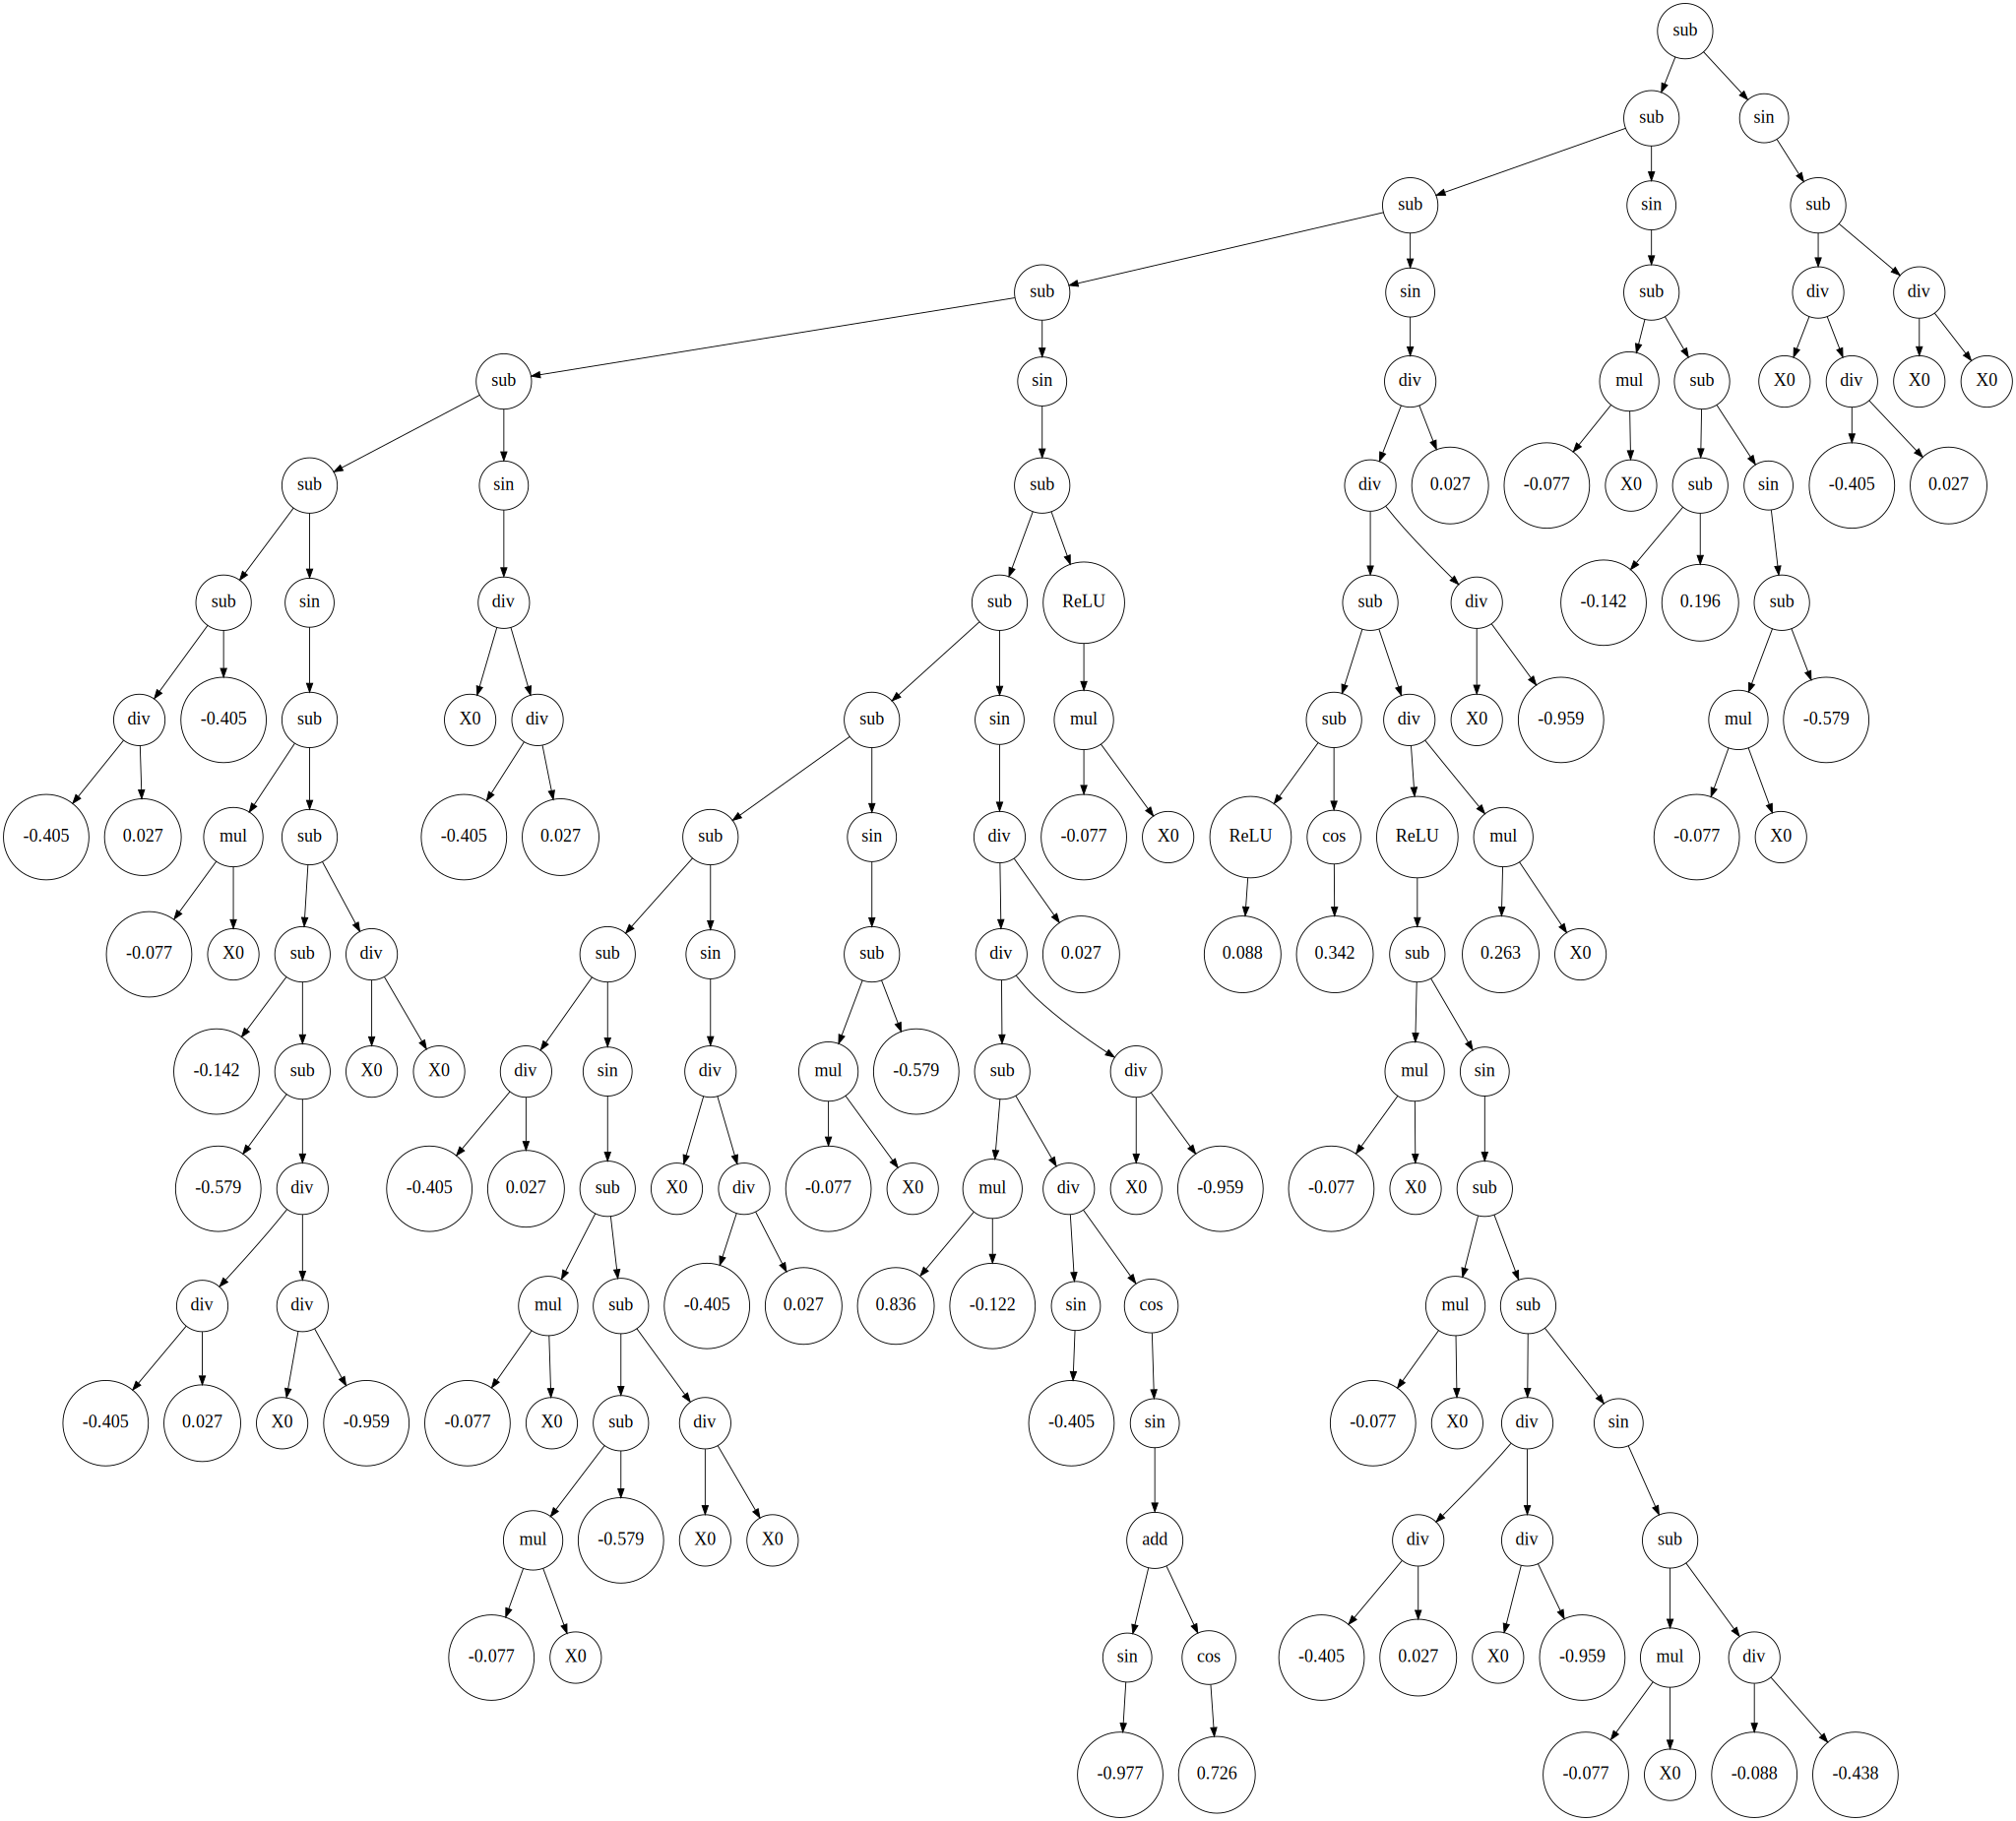

In [ ]:
import graphviz

# Assuming dot_data contains the DOT data from est_gp._program.export_graphviz()
dot_data = est_gp._program.export_graphviz()

# Split the DOT data into lines
lines = dot_data.split('\n')

# Containers for new lines
new_lines = []

# Modify the DOT data lines to adjust pointer size, font size, and remove fill style
for line in lines:
    if line.startswith('node ['):
        # Modify the global node attributes
        new_lines.append('node [shape=circle, fontsize=20, width=0.1, height=0.1];')
    elif line.startswith('edge ['):
        # Modify the global edge attributes if necessary (not specified in the request)
        new_lines.append(line)
    elif '->' in line:
        # Edge lines, typically not needing modification in this context
        new_lines.append(line)
    else:
        # Modify individual node attributes if necessary
        if 'shape=box' in line:
            new_lines.append(line.replace('shape=box', 'shape=box, fontsize=20, width=0.1, height=0.1'))
        else:
            new_lines.append(line)

# Join the modified lines back into a single string
modified_dot_data = '\n'.join(new_lines)

# Create a Graphviz source object with the modified DOT data
graph = graphviz.Source(modified_dot_data)

# Render the graph to a PNG file and cleanup intermediate files
graph.render('images/ex1', format='png', cleanup=True)

# Display the graph
graph


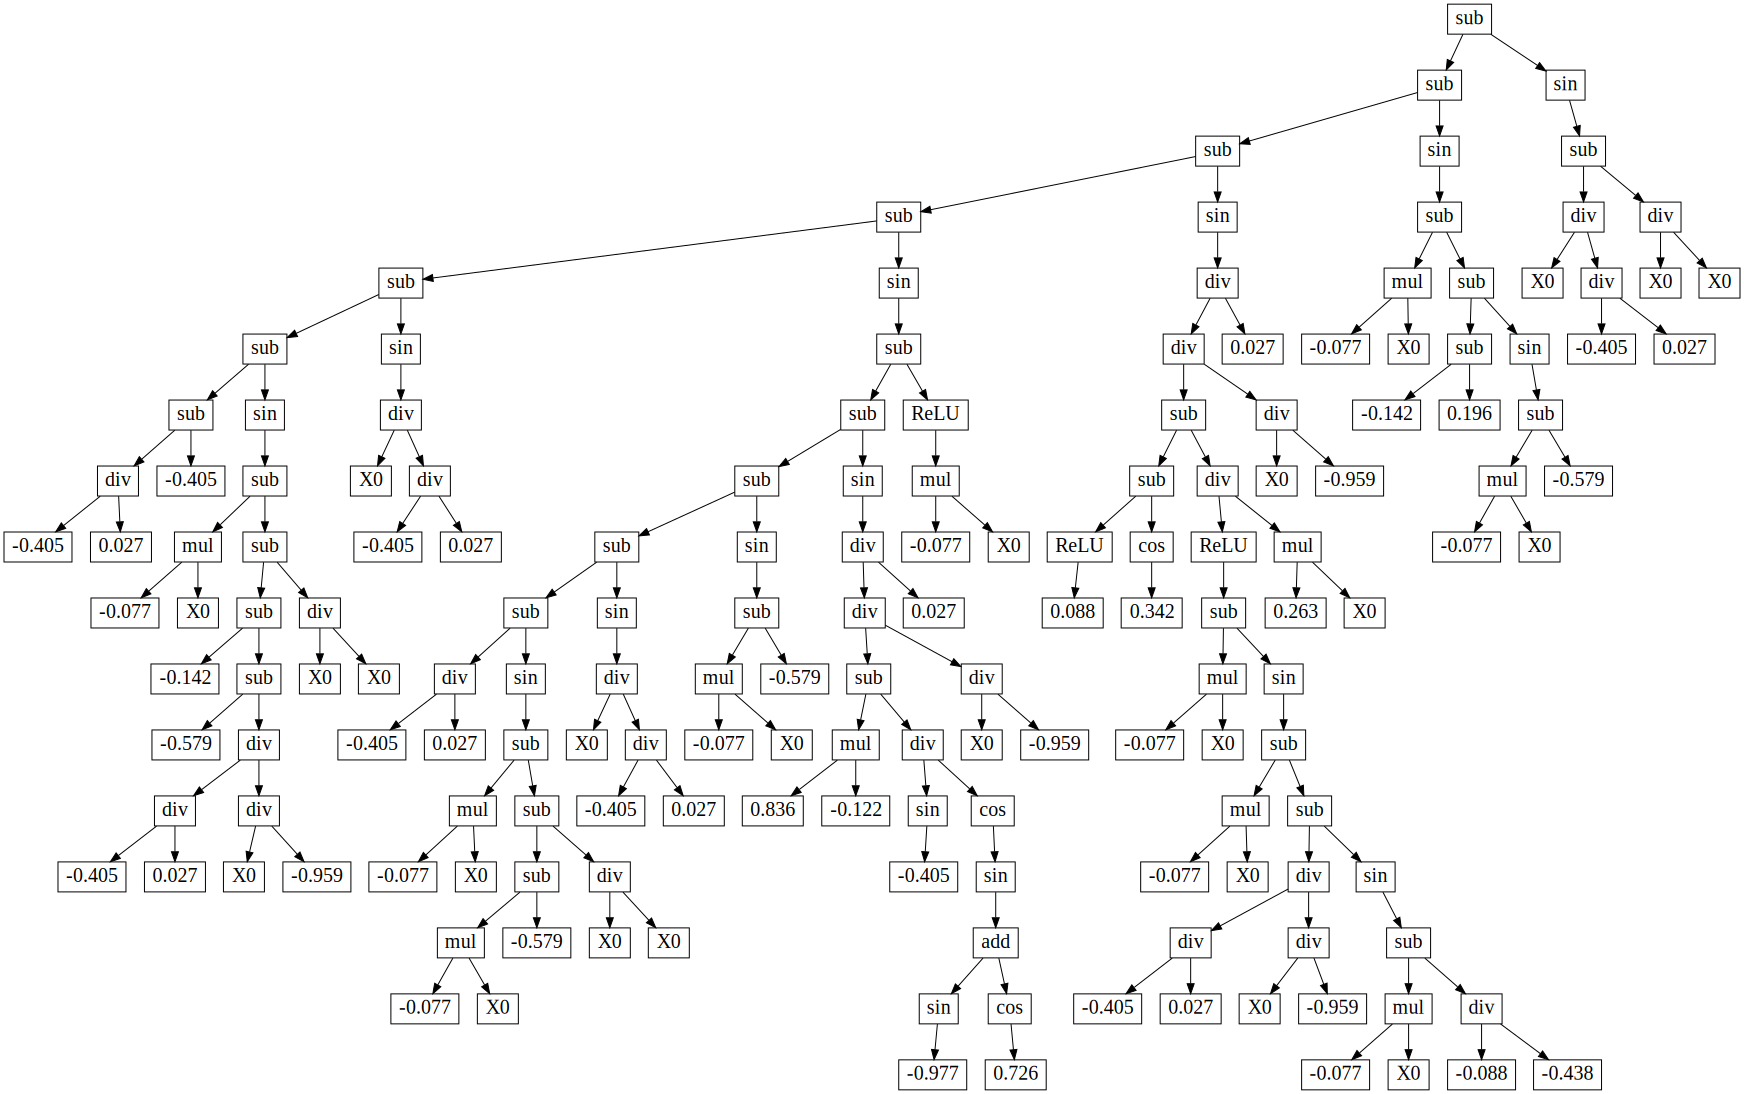

In [ ]:
import graphviz

# Assuming dot_data contains the DOT data from est_gp._program.export_graphviz()
dot_data = est_gp._program.export_graphviz()

# Split the DOT data into lines
lines = dot_data.split('\n')

# Containers for new lines
new_lines = []

# Modify the DOT data lines to adjust pointer size, font size, remove fill style, and reduce edge length
for line in lines:
    if line.startswith('node ['):
        # Modify the global node attributes
        new_lines.append('node [shape=box, fontsize=20, width=0.1, height=0.1];')
    elif line.startswith('edge ['):
        # Modify the global edge attributes if necessary (not specified in the request)
        new_lines.append(line.replace('];', ', len=0.5];'))  # Adjust edge length here
    elif '->' in line:
        # Edge lines, typically not needing modification in this context
        new_lines.append(line)
    else:
        # Modify individual node attributes if necessary
        if 'shape=box' in line:
            new_lines.append(line.replace('shape=box', 'shape=box, fontsize=20, width=0.1, height=0.1'))
        else:
            new_lines.append(line)

# Join the modified lines back into a single string
modified_dot_data = '\n'.join(new_lines)

# Create a Graphviz source object with the modified DOT data
graph = graphviz.Source(modified_dot_data)

# Render the graph to a PNG file and cleanup intermediate files
graph.render('images/ex1', format='png', cleanup=True)

# Display the graph
graph


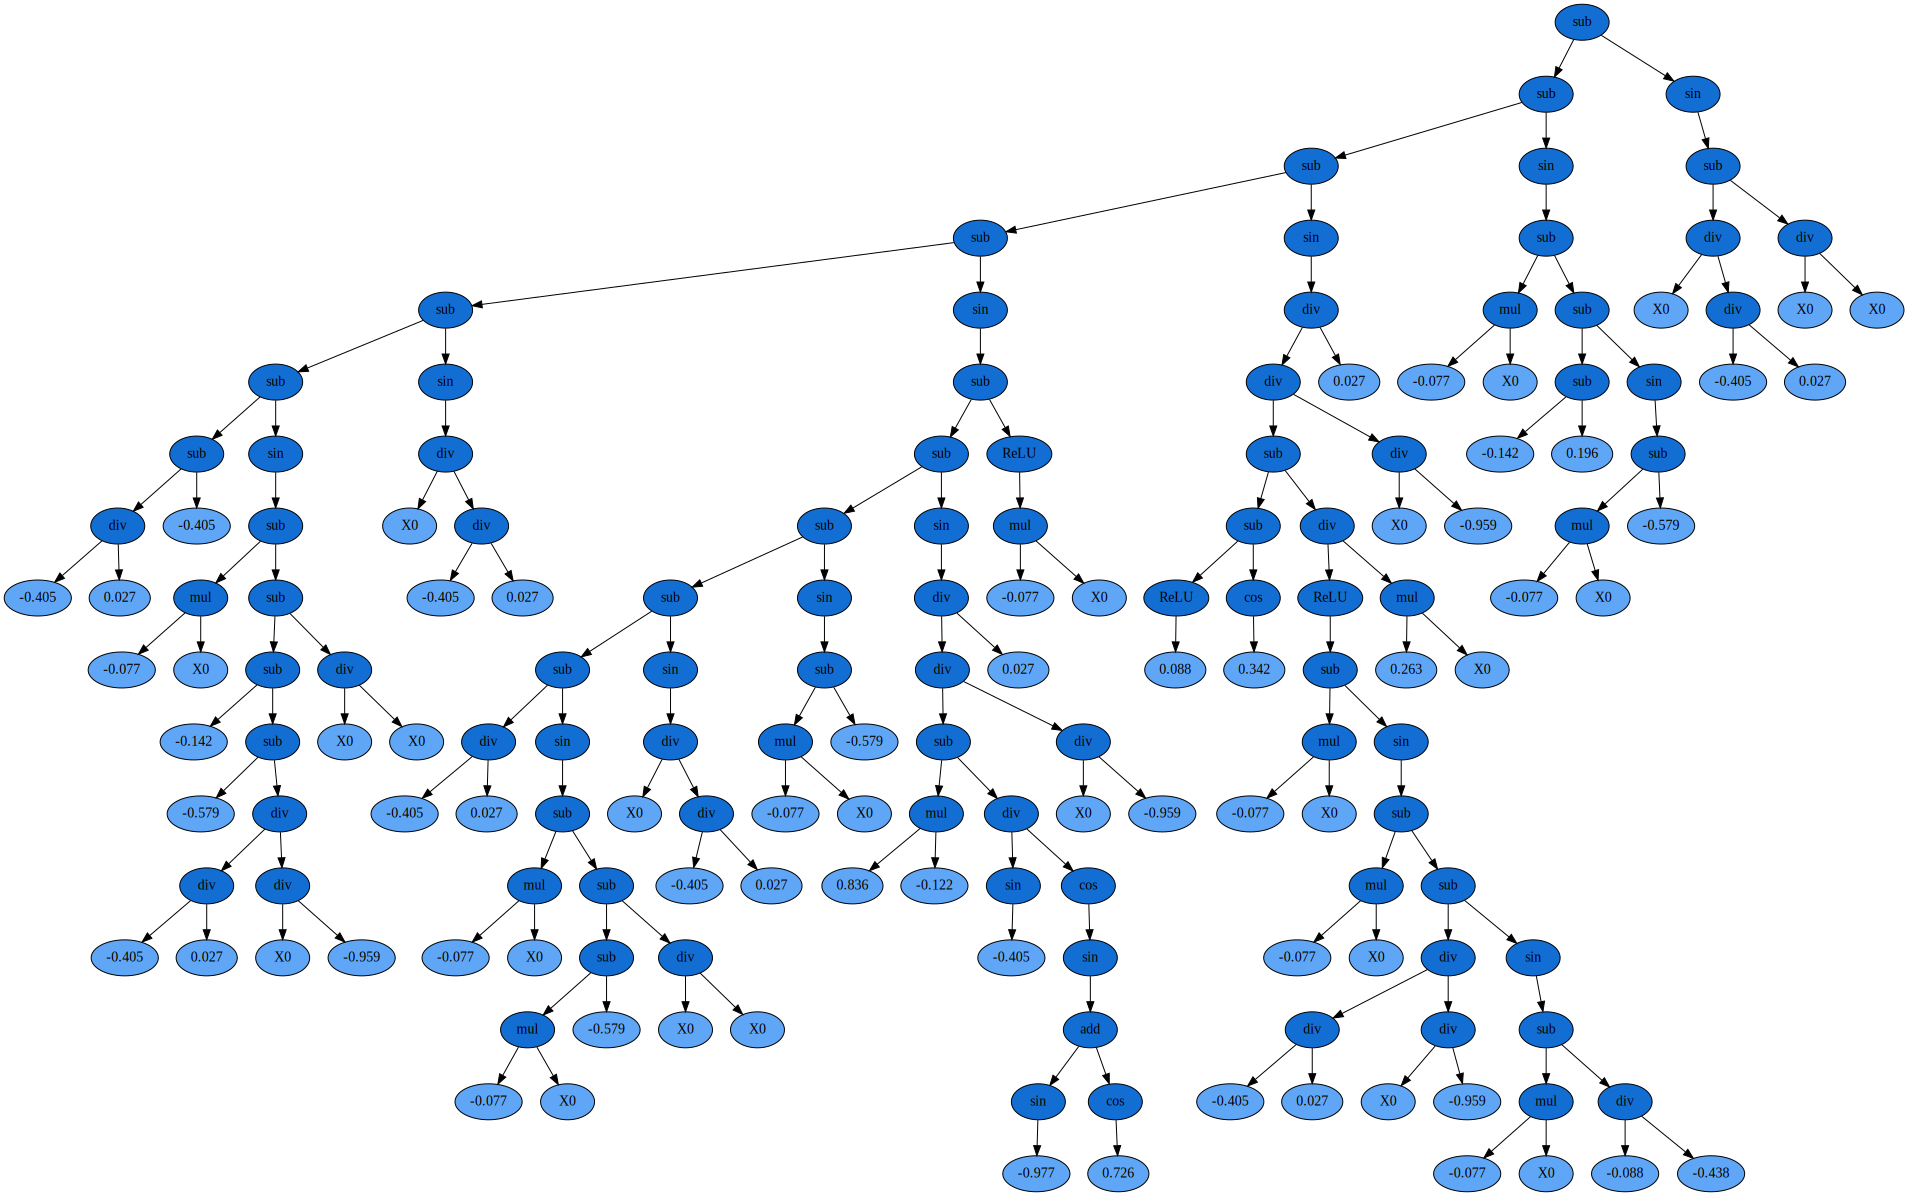

In [ ]:
graph = graphviz.Source(modified_dot_data)
graph.render('images/ex1', format='png', cleanup=True)
graph

In [ ]:
# Assuming 'est_tree' is a DecisionTreeRegressor model, you need to fit it to your data first.
from sklearn.tree import DecisionTreeRegressor

# Initialize the DecisionTreeRegressor
est_tree = DecisionTreeRegressor()

# Fit the model to your training data (replace 'X_train' and 'y_train' with your actual data)
est_tree.fit(X_train, y_train)
X_train_array = np.array(X_train.values)

viz = dtreeviz(est_tree,
               X_train.values,
               y_train,
               target_name='SNR',
               feature_names=list(X_train.columns),
               title="Decision Tree - SNR Prediction",
               fontname="Arial",
               title_fontsize=16,
              )

viz.save("decision_tree.svg") # suffix determines the generated image format
viz

<ipython-input-39-0cd0278bf815>:11: DeprecationWarning: dtreeviz() function is deprecated starting from version 2.0. 
 For the same functionality, please use this code instead: 
 m = dtreeviz.model(...) 
 m.view()


TypeError: 'int' object is not subscriptable

In [ ]:
viz = dtreeviz(est_tree,
               x_data=X_train,
               y_data=y_train,
               target_name='SNR',
               feature_names=X_train.columns,
               title="Decision Tree - SNR Prediction",
               fontname="Arial",
               title_fontsize=16,
              )

viz.save("decision_tree.svg") # suffix determines the generated image format
viz

NameError: name 'est_tree' is not defined

In [ ]:
est_gp = SymbolicRegressor(population_size=5000, function_set = function_set,
                           generations=20, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.0005, random_state=0)

In [ ]:
t0 = time.time()
est_gp.fit(X_train, y_train)
print('Time to fit:', time.time() - t0, 'seconds')

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    18.73      4.24639e+08        7          3.19525          2.80237      7.72m
   1    19.09          2088.32        7          3.05568          4.04304      3.23m
   2    21.38          3070.02       13          2.96557          3.35917      1.70m
   3    15.41          3516.85       17          2.75784          2.33243      1.03m
   4    10.56          1039.09       17          2.64144          3.36705      1.24m
   5    12.20          1099.44       14          2.56584          3.50885     57.23s
   6    16.38          1834.65       23          2.39713          2.09395     54.72s
   7    18.20          141.455       30           2.2163          2.42681      1.03m
   8    20.88          312.127       42          1.86969          1.57431  

In [ ]:
t0 = time.time()
y_gp2 = est_gp.predict(X_test)
print('Time to predict:', time.time() - t0, 'seconds')

Time to predict: 0.0029222965240478516 seconds


In [ ]:
score_gp2 = est_gp.score(X_test, y_test)
print('R2:', score_gp2)

R2: 0.8249786149952006


In [ ]:
next_e = sympify(str(est_gp._program), locals=converter)
next_e

sin(0.0666666666666667*X0) + sin(35.5185185185185*(ReLU(0.088) - 0.942085806280011 - 3.80228136882129*ReLU(-0.077*X0 + sin(0.077*X0 + sin(0.077*X0 + 0.200913242009132) + 14.385/X0))/X0)/X0) + sin(0.0666666666666667*X0 + 1) + sin(0.077*X0 - 0.563 + 14.385/X0) + sin(0.077*X0 + sin(0.077*X0 - 0.579) - 0.338) - sin(-ReLU(-0.077*X0) + sin(10.418278203971/X0) + sin(0.0666666666666667*X0) + sin(0.077*X0 - 0.579) - 15.4086733379675) - 14.595

Text(0.5, 0, 'index')

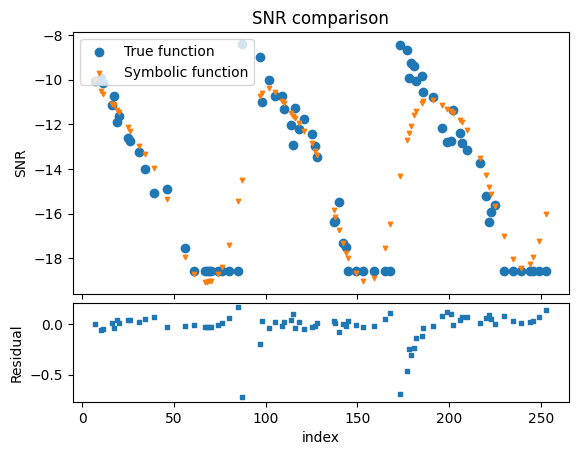

In [ ]:
fig = plt.figure(constrained_layout=False, dpi=100)
gs = fig.add_gridspec(nrows=7, ncols=1)
f_ax1 = fig.add_subplot(gs[0:5,0])
plt.title('SNR comparison')
plt.scatter(X_test, y_test, label = 'True function')
plt.scatter(X_test, y_gp2, marker = 'v', s = 10, label = 'Symbolic function')
plt.legend()
plt.ylabel('SNR')
f_ax2 = fig.add_subplot(gs[5:7, 0])
plt.scatter(X_test, 1. - y_gp2/y_test, marker = 's', s = 10)
plt.ylabel('Residual')
plt.xlabel('index')

Text(0.5, 0, 'index')

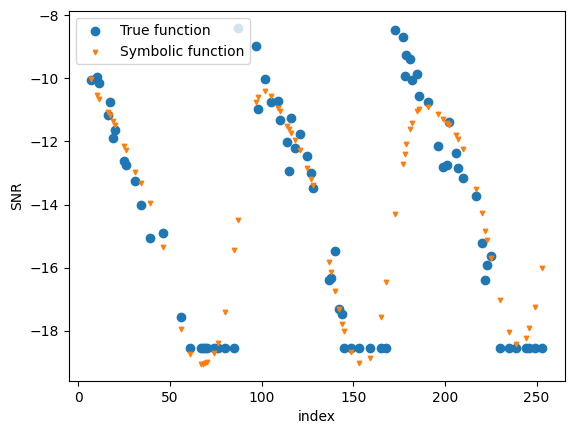

In [ ]:
plt.scatter(X_test, y_test, label='True function')
plt.scatter(X_test, y_gp1, marker='v', s=10, label='Symbolic function')
plt.legend()
plt.ylabel('SNR')
plt.xlabel('index')


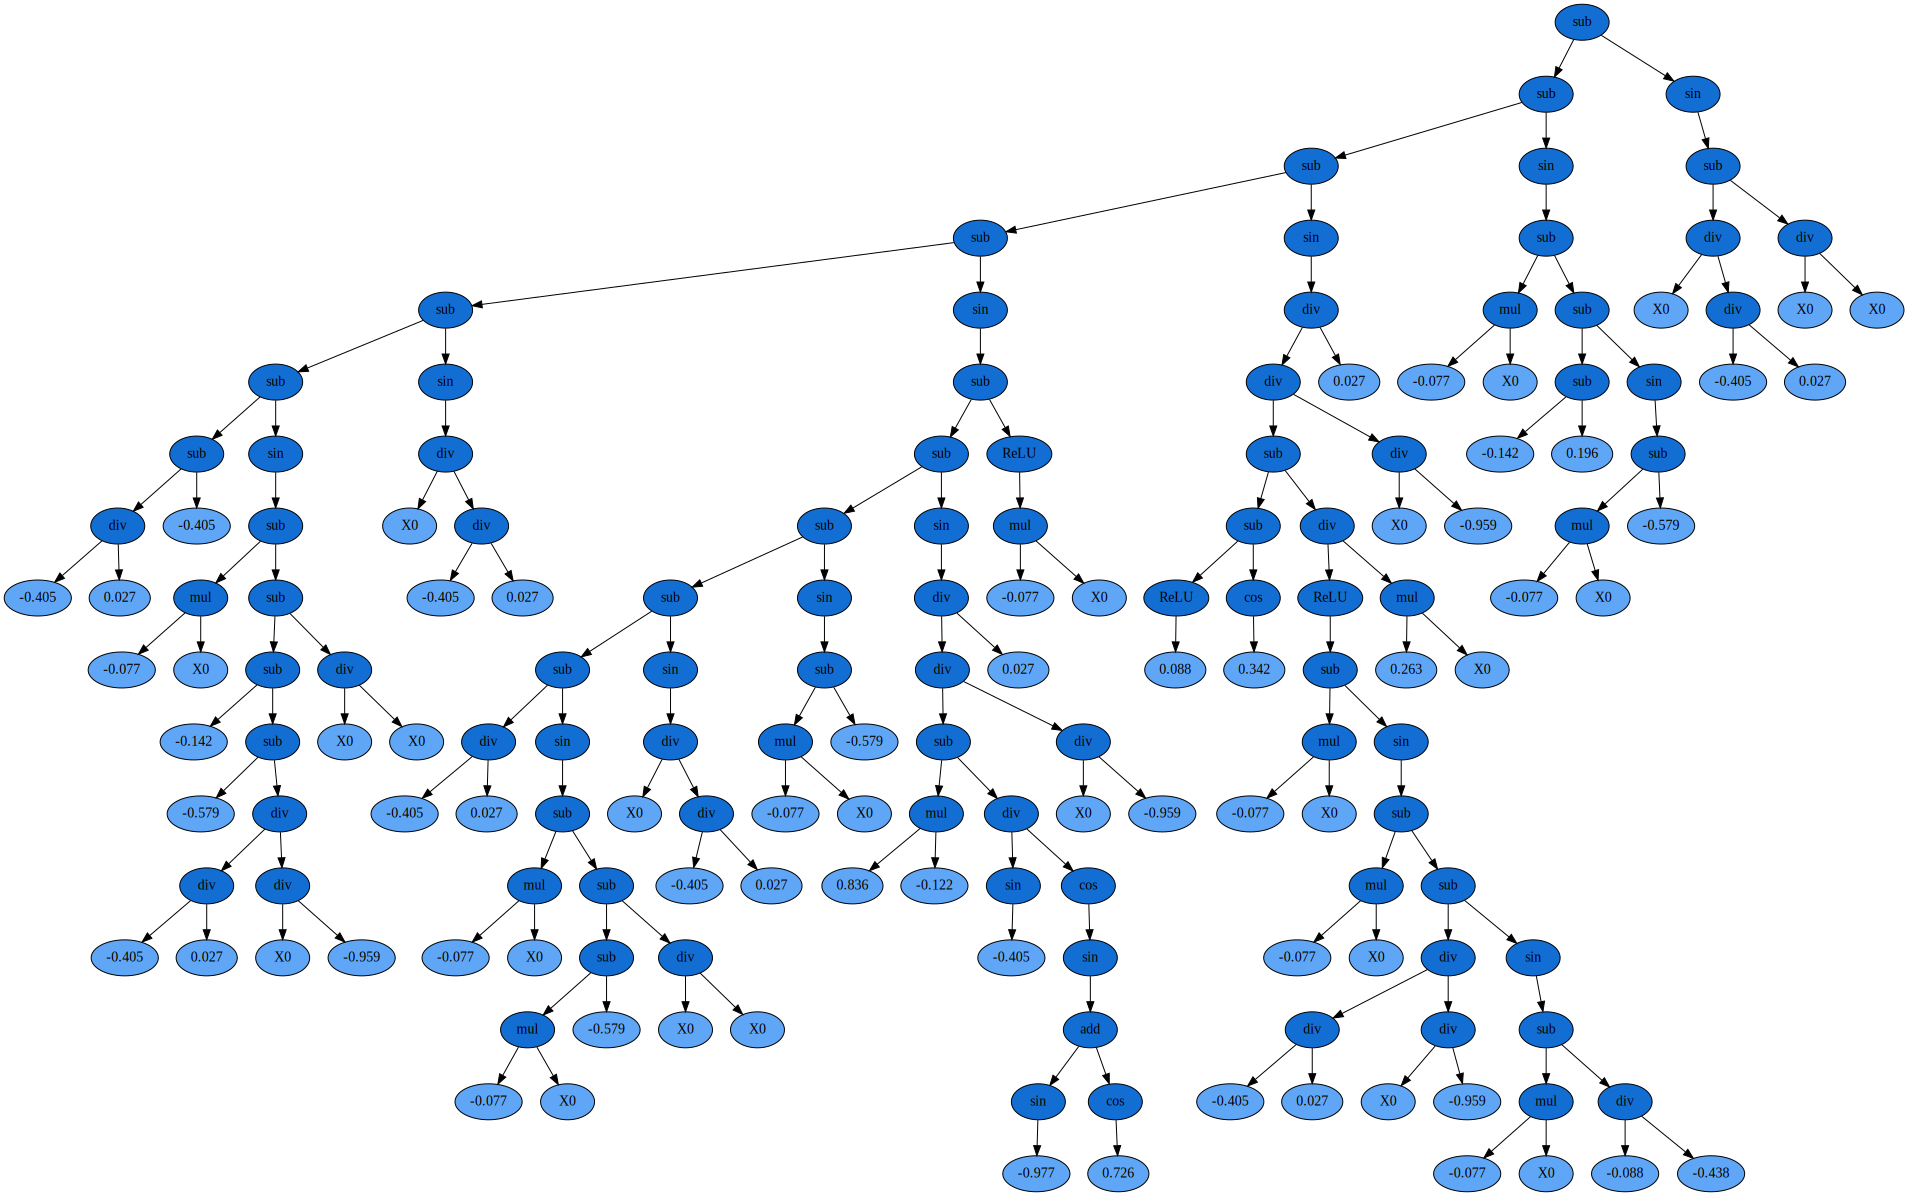

In [ ]:
dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph.render('images/ex2', format='png', cleanup=True)
graph

In [ ]:
est_tree = DecisionTreeRegressor(max_depth=5)
t0 = time.time()
est_tree.fit(X_train, y_train)
print('Time to fit:', time.time() - t0, 'seconds')

Time to fit: 0.0042765140533447266 seconds


In [ ]:
t0 = time.time()
y_tree = est_tree.predict(X_test)
print('Time to predict:', time.time() - t0, 'seconds')

Time to predict: 0.0014197826385498047 seconds


In [ ]:
#Score
score_tree = est_tree.score(X_test, y_test)
print('DT:', score_tree)

DT: 0.9135469763943553


Text(0.5, 0, 'z')

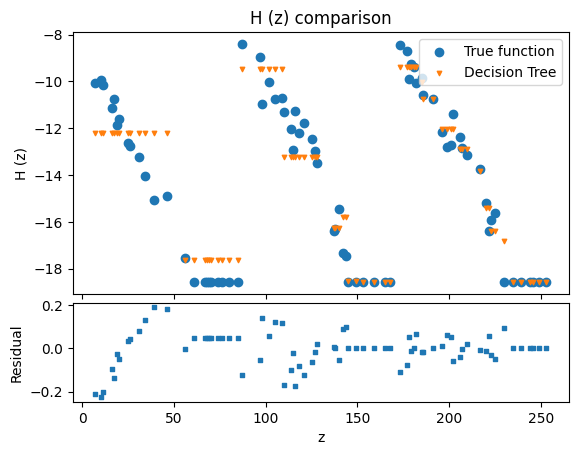

In [ ]:
fig = plt.figure(constrained_layout=False, dpi=100)
gs = fig.add_gridspec(nrows=7, ncols=1)
f_ax1 = fig.add_subplot(gs[0:5,0])
plt.title('H (z) comparison')
plt.scatter(X_test, y_test, label = 'True function')
plt.scatter(X_test, y_tree, marker = 'v', s = 10, label = 'Decision Tree')
plt.legend()
plt.ylabel('H (z)')
f_ax2 = fig.add_subplot(gs[5:7, 0])
plt.scatter(X_test, 1. - y_tree/y_test, marker = 's', s = 10)
plt.ylabel('Residual')
plt.xlabel('z')